In [1]:
import pandas as pd
import pyranges as pr
import upsetplot
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [9]:
h5 = 'triplets/cerberus_annot_triplets.h5'
filt_ab = 'cerberus_filtered_abundance.tsv'
feat = 'tss'
ref = '../../refs/cerberus/v40_transcript_metadata.tsv'
swan_file = 'swan/swan.p'

## Density plots for different states in differentiation

In [10]:
ca = cerberus.read(h5)
sg = swan.read(swan_file)

Read in graph from swan/swan.p


In [13]:
diff_cell_lines = ['h9', 'hl60', 'pgp1']
diff_samples = []
for cl in diff_cell_lines:
    diff_samples.append(sg.adata.obs.loc[sg.adata.obs['sample'].str.contains(cl), 'sample'].unique().tolist())

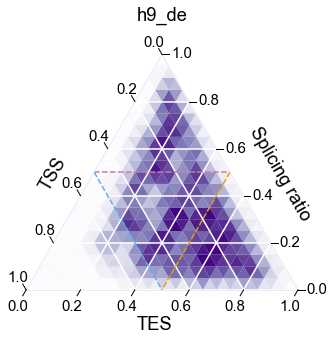

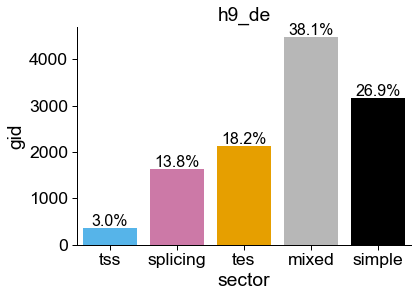

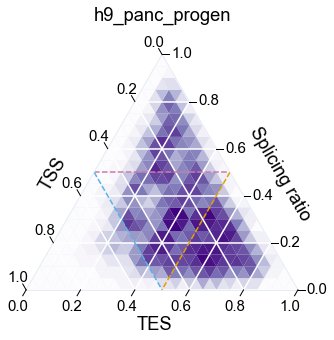

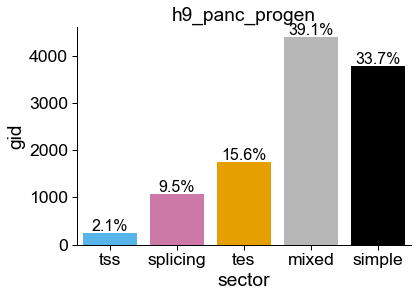

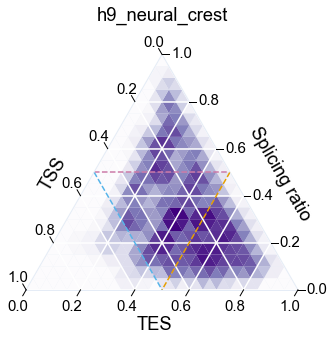

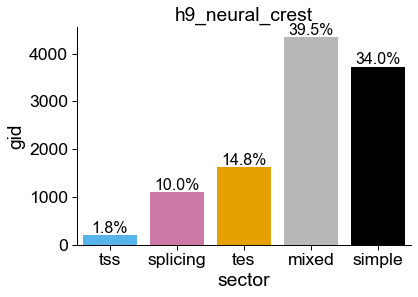

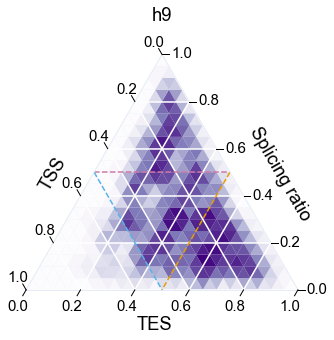

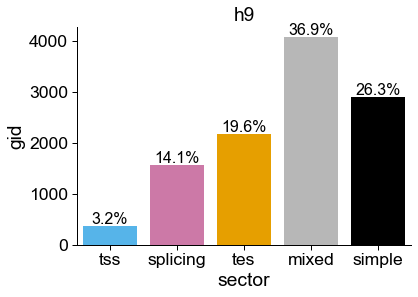

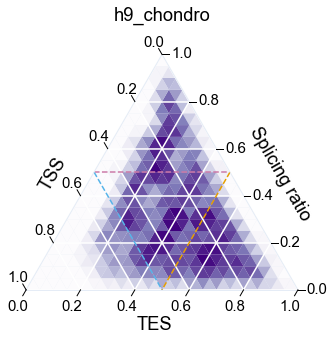

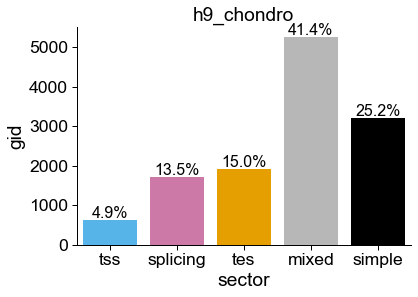

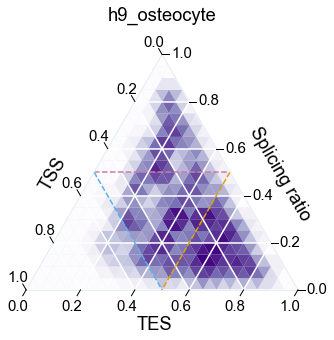

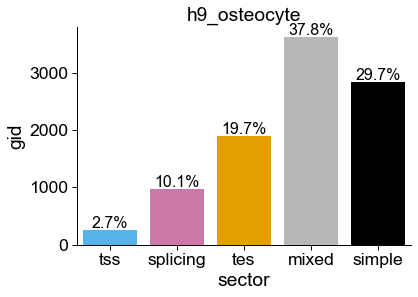

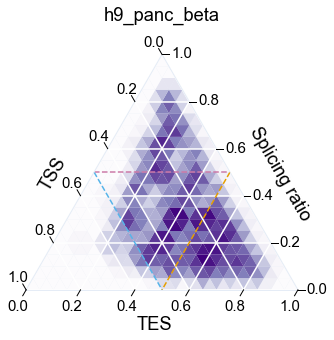

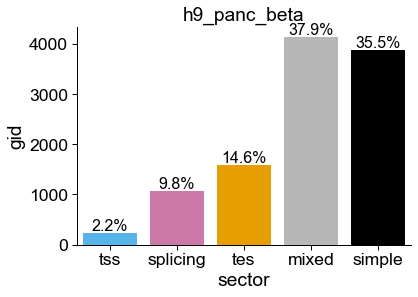

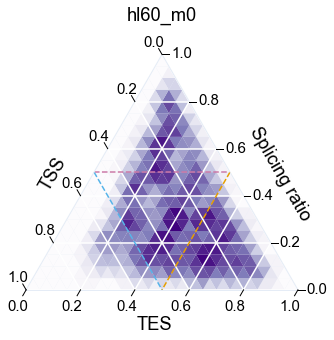

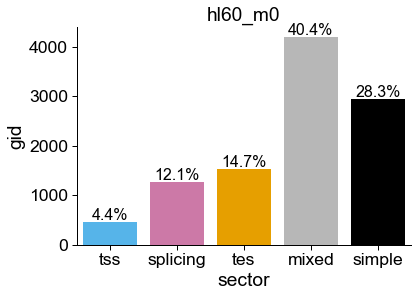

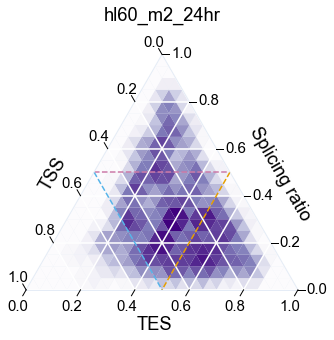

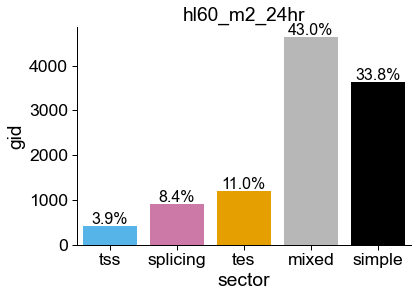

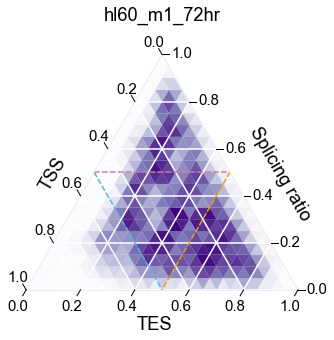

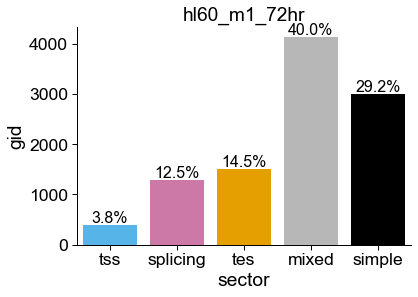

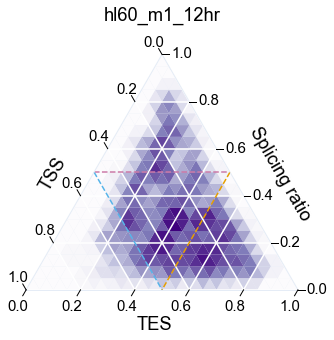

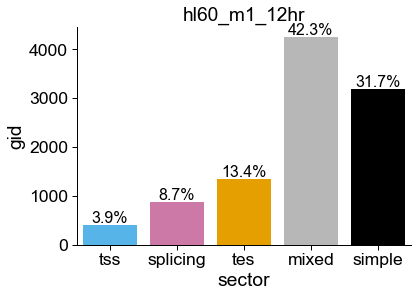

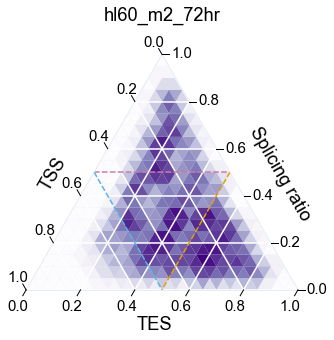

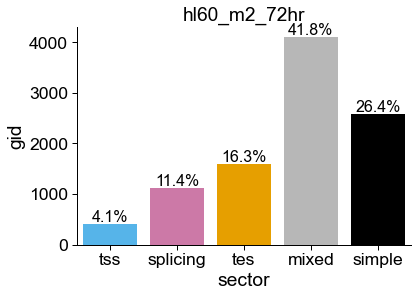

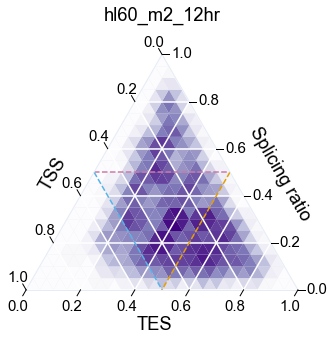

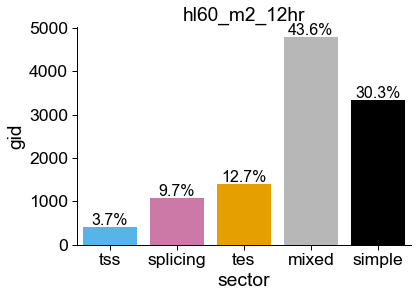

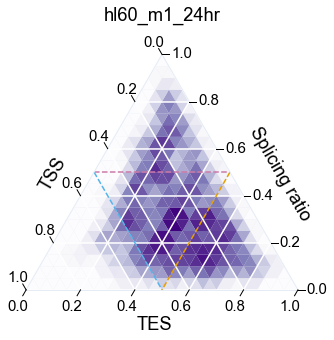

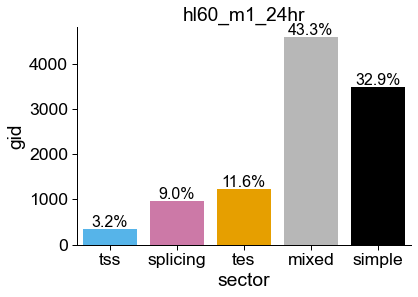

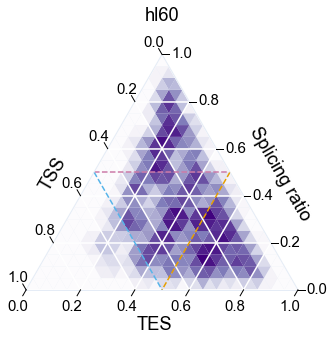

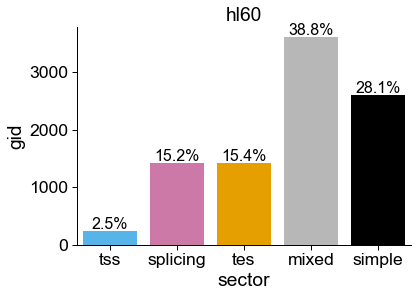

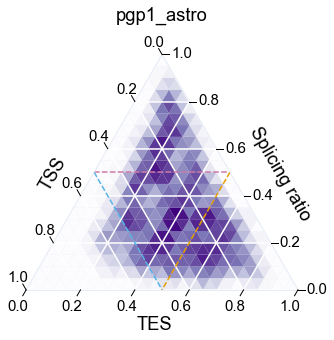

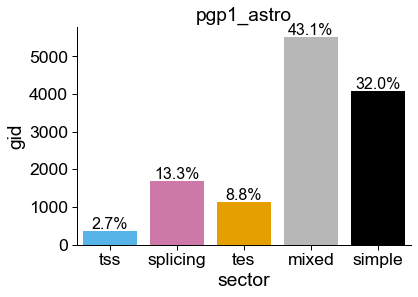

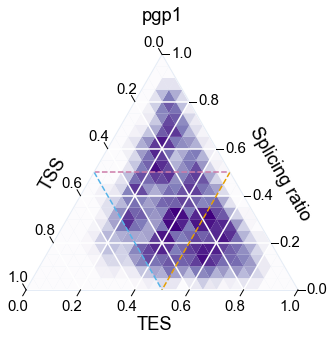

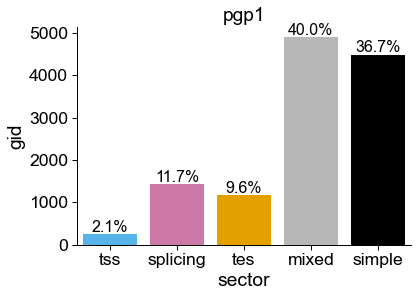

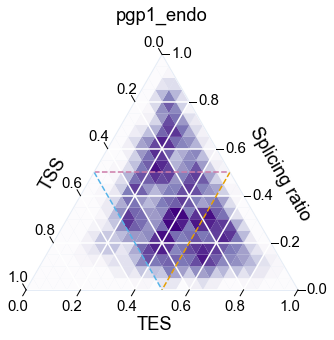

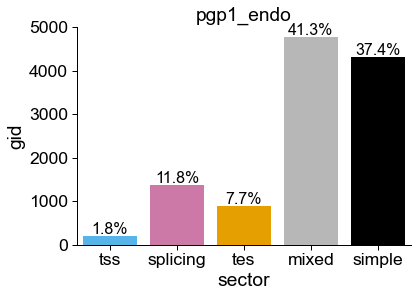

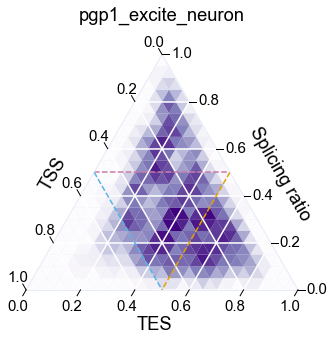

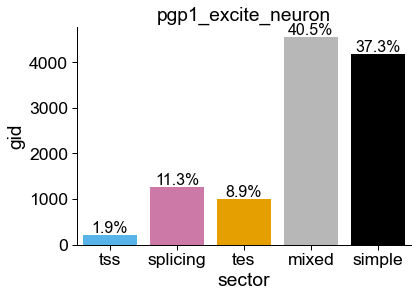

In [70]:
c_dict, order = get_sector_colors()

for states in diff_samples:
    for cl in states:
        
        fname = 'figures/simplex_{}_density.pdf'.format(cl)
        temp = ca.plot_simplex(top='splicing_ratio',
                    subset={'source': 'sample_det', 'sample': cl},
                    density=True,
                    density_scale=20,
                    density_cmap='Purples',
                    log_density=True,
                    sectors=True,
                    scatter=False,
                    legend=False,
                    title=cl,
                    size_scale=0.5,
                    density_cbar=False,
                    fname=fname)
        plt.show()
        
        plt.clf()
        make_plot(temp, c_dict, cl)
    #     break
    # break

In [64]:
def make_plot(temp, c_dict, cl):
    temp = assign_gisx_sector(temp)
    temp = temp[['gid', 'sector']].groupby('sector').count().reset_index()
    total = temp.gid.sum()
    temp['perc'] = (temp['gid']/total)*100

    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['pdf.fonttype'] = 42
    sns.set_context('paper', font_scale=2)

    ax = sns.barplot(data=temp, y='gid', x='sector', palette=c_dict, order=order, saturation=1)

    def add_perc_2(ax, df):
        ylim = ax.get_ylim()[1]
        n_cats = len(ax.patches)
        for p in ax.patches:
            percentage = df.loc[df.gid == p.get_height(), 'perc'].values[0]
            percentage = '{:.1f}%'.format(percentage)
            x = p.get_x() + p.get_width() / 2
            # x = p.get_x() + p.get_width() / 2 - 0.3
            # x = p.get_x() + p.get_width() / 2 - (0.015)*n_cats
            y = p.get_y() + p.get_height() + ylim*0.01
            ax.annotate(percentage, (x, y), size=16, horizontalalignment='center')
    add_perc_2(ax, temp)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    _ = ax.set(title=cl)

## GO enrichment on different sectors